In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/big-data-competition-statistics-explore-2024/sample_submission.csv
/kaggle/input/big-data-competition-statistics-explore-2024/Test Data/TEST BDC FIX WITH ACAK/Test_262.jpg
/kaggle/input/big-data-competition-statistics-explore-2024/Test Data/TEST BDC FIX WITH ACAK/Test_422.jpg
/kaggle/input/big-data-competition-statistics-explore-2024/Test Data/TEST BDC FIX WITH ACAK/Test_98.jpg
/kaggle/input/big-data-competition-statistics-explore-2024/Test Data/TEST BDC FIX WITH ACAK/Test_385.jpg
/kaggle/input/big-data-competition-statistics-explore-2024/Test Data/TEST BDC FIX WITH ACAK/Test_108.jpg
/kaggle/input/big-data-competition-statistics-explore-2024/Test Data/TEST BDC FIX WITH ACAK/Test_157.jpg
/kaggle/input/big-data-competition-statistics-explore-2024/Test Data/TEST BDC FIX WITH ACAK/Test_240.jpg
/kaggle/input/big-data-competition-statistics-explore-2024/Test Data/TEST BDC FIX WITH ACAK/Test_324.jpg
/kaggle/input/big-data-competition-statistics-explore-2024/Test Data/TEST BDC FI

In [2]:
#Import Library


import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import shutil
from PIL import Image
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
def create_directories(base_path):
    #Membuat jalur directori
    train_dir = os.path.join(base_path, 'train')
    validation_dir = os.path.join(base_path, 'validation')
    test_dir = os.path.join(base_path, 'test')

    # Membuat Directori
    for directory in [train_dir, validation_dir, test_dir]:
        if not os.path.exists(directory):
            os.makedirs(directory)

    # Membuat Kelas pada data set
    for Hutan in ['Fire', 'None', 'Smoke', 'Smoke and Fire']:
        for directory in [train_dir, validation_dir, test_dir]:
            Hutan_dir = os.path.join(directory, Hutan)
            if not os.path.exists(Hutan_dir):
                os.makedirs(Hutan_dir)

def split_data(source_dir, dest_dir, split_ratio=(0.7, 0.2, 0.1)):
    classes = ['Fire', 'None', 'Smoke', 'Smoke and Fire']

    for class_name in classes:
        class_dir = os.path.join(source_dir, class_name)

        if not os.path.exists(class_dir):
            print(f"Warning: Directory {class_dir} does not exist. Skipping.")
            continue

        images = os.listdir(class_dir)
        if len(images) == 0:
            print(f"Warning: No images found in {class_dir}. Skipping.")
            continue

        random.shuffle(images)

        total_images = len(images)
        train_split = int(split_ratio[0] * total_images)
        validation_split = int(split_ratio[1] * total_images)

        train_images = images[:train_split]
        validation_images = images[train_split:train_split + validation_split]
        test_images = images[train_split + validation_split:]

        # Memindahkan File
        for img in train_images:
            src = os.path.join(class_dir, img)
            dst = os.path.join(dest_dir, 'train', class_name, img)
            try:
                shutil.copy(src, dst)
            except Exception as e:
                print(f"Error copying {src} to {dst}: {e}")
        for img in validation_images:
            src = os.path.join(class_dir, img)
            dst = os.path.join(dest_dir, 'validation', class_name, img)
            try:
                shutil.copy(src, dst)
            except Exception as e:
                print(f"Error copying {src} to {dst}: {e}")
        for img in test_images:
            src = os.path.join(class_dir, img)
            dst = os.path.join(dest_dir, 'test', class_name, img)
            try:
                shutil.copy(src, dst)
            except Exception as e:
                print(f"Error copying {src} to {dst}: {e}")

source_directory = "/kaggle/input/big-data-competition-statistics-explore-2024/Train Data/Train Data"
destination_directory = "/kaggle/working/datasets"
create_directories(destination_directory)
split_data(source_directory, destination_directory)


In [4]:
def count_items_in_directory(directory):
    item_count = 0
    for root, dirs, files in os.walk(directory):
        item_count += len(files)
    return item_count

def count_items(base_path):
    categories = ['train', 'validation', "test"]
    classes = ['Fire', 'None', 'Smoke', 'Smoke and Fire']

    for category in categories:
        print(f"--- {category.capitalize()} Data ---")
        category_path = os.path.join(base_path, category)
        for class_name in classes:
            class_path = os.path.join(category_path, class_name)
            if os.path.exists(class_path):
                num_items = count_items_in_directory(class_path)
                print(f"{class_name.capitalize()}: {num_items} images")
            else:
                print(f"{class_name.capitalize()}: Directory does not exist")

#Defini datasumber
base_path = '/kaggle/working/datasets'
count_items(base_path)

--- Train Data ---
Fire: 861 images
None: 2158 images
Smoke: 212 images
Smoke and fire: 1900 images
--- Validation Data ---
Fire: 246 images
None: 616 images
Smoke: 60 images
Smoke and fire: 543 images
--- Test Data ---
Fire: 123 images
None: 309 images
Smoke: 31 images
Smoke and fire: 272 images


In [5]:
from PIL import Image

def check_images_in_directory(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            try:
                img_path = os.path.join(root, file)
                img = Image.open(img_path)  # Coba buka gambar
                img.verify()  # Verifikasi apakah ini gambar yang valid
            except (IOError, Image.UnidentifiedImageError) as e:
                print(f"File tidak valid ditemukan: {img_path}, Error: {e}")

# memeriksa semua dataset
check_images_in_directory("/kaggle/working/datasets/train")
check_images_in_directory("/kaggle/working/datasets/validation")
check_images_in_directory("/kaggle/working/datasets/test")


File tidak valid ditemukan: /kaggle/working/datasets/train/Smoke and Fire/Train Data (838).jpg, Error: cannot identify image file '/kaggle/working/datasets/train/Smoke and Fire/Train Data (838).jpg'


In [6]:
def remove_invalid_images(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    img.verify()
            except (IOError, Image.UnidentifiedImageError):
                print(f"Menghapus file yang rusak: {file_path}")
                os.remove(file_path)

# Menghapus gambar yang tidak valid dari direktori
remove_invalid_images('/kaggle/working/datasets/train')
remove_invalid_images('/kaggle/working/datasets/validation')
remove_invalid_images('/kaggle/working/datasets/test')


Menghapus file yang rusak: /kaggle/working/datasets/train/Smoke and Fire/Train Data (838).jpg


In [7]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.89 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5845.9/8062.4 GB disk)


In [8]:
from ultralytics import YOLO

from IPython.display import display, Image

In [47]:
!yolo task=classify mode=train model=yolov8m-cls.pt data=/kaggle/working/datasets epochs=10 imgsz=224 patience=3

New https://pypi.org/project/ultralytics/8.2.90 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.89 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=classify, mode=train, model=yolov8m-cls.pt, data=/kaggle/working/datasets, epochs=10, time=None, patience=3, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False

**VALIDATION**

In [48]:
!yolo task=classify mode=val model=/kaggle/working/runs/classify/train8/weights/best.pt data=/kaggle/working/datasets

Ultralytics YOLOv8.2.89 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8m-cls summary (fused): 103 layers, 15,767,780 parameters, 0 gradients, 41.6 GFLOPs
train: /kaggle/working/datasets/train... found 5130 images in 4 classes ✅ 
val: /kaggle/working/datasets/validation... found 1465 images in 4 classes ✅ 
test: /kaggle/working/datasets/test... found 735 images in 4 classes ✅ 
val: Scanning /kaggle/working/datasets/validation... 1465 images, 0 corrupt: 100
               classes   top1_acc   top5_acc: 100%|██████████| 92/92 [00:05<00:0
                   all      0.901          1
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val6
💡 Learn more at https://docs.ultralytics.com/modes/val


Text(0.5, 0, 'epochs')

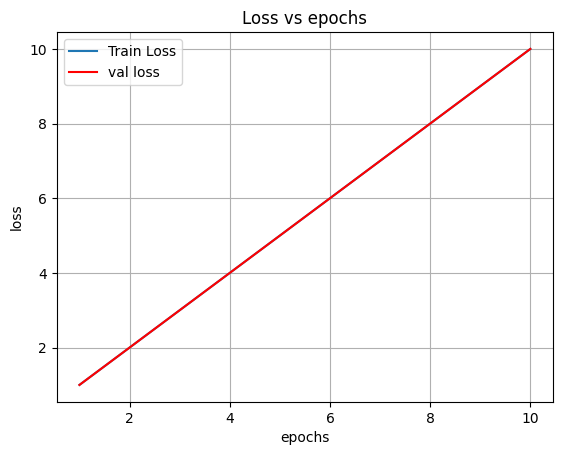

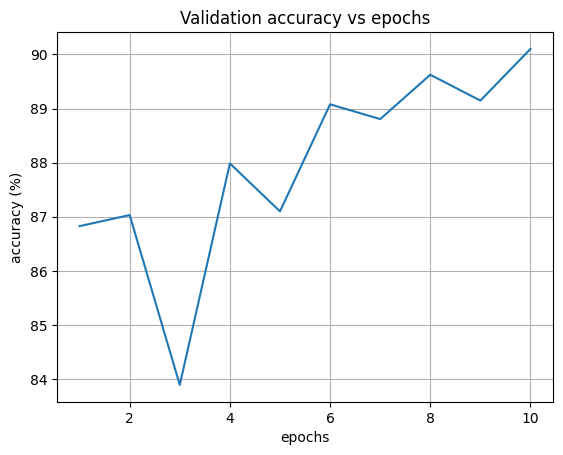

In [49]:
results_path = '/kaggle/working/runs/classify/train8/results.csv'
results = pd.read_csv(results_path)

plt.figure()
plt.plot(results['                  epoch'], results['                  epoch'],label = "Train Loss")
plt.plot(results['                  epoch'], results['                  epoch'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

plt.figure()
plt.plot(results['                  epoch'], results['  metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')

In [50]:
!yolo task=classify mode=predict model=/kaggle/working/runs/classify/train8/weights/best.pt conf=0.25 source="/kaggle/input/big-data-competition-statistics-explore-2024/Test Data/TEST BDC FIX WITH ACAK"

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Ultralytics YOLOv8.2.89 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8m-cls summary (fused): 103 layers, 15,767,780 parameters, 0 gradients, 41.6 GFLOPs

image 1/543 /kaggle/input/big-data-competition-statistics-explore-2024/Test Data/TEST BDC FIX WITH ACAK/Test_1.jpg: 224x224 Fire 0.79, Smoke and Fire 0.21, Smoke 0.00, None 0.00, 4.5ms
image 2/543 /kaggle/input/big-data-competition-statistics-explore-2024/Test Data/TEST BDC FIX WITH ACAK/Test_10.jpg: 224x224 Smoke and Fire 0.96, Fire 0.04, None 0.00, Smoke 0.00, 4.4ms
image 3/543 /kaggle/input/big-data-competition-statistics-explore-2024/Test Data/TEST BDC FIX WITH ACAK/Test_100.jpg: 224x224 None 0.92, Smoke 0.08, Smoke and Fire 0.00, Fire 0.00, 4.3ms
image 4/543 /kaggle/input/big-data-competition-statistics-explore-2024/Test Data/TEST BDC FIX WITH ACAK/Test_101.jpg: 224x224 Fire 0.71, Smoke and Fire 0.29, None 0.00, Smoke 0.00, 4.4ms
image 5/543 /kaggle/input/big-data-competition-statistics-explore-2024/T

In [51]:
# Load YOLOv8 model
model = YOLO('/kaggle/working/runs/classify/train8/weights/best.pt')

results = model('/kaggle/input/big-data-competition-statistics-explore-2024/Test Data/TEST BDC FIX WITH ACAK/Test_1.jpg')  # predict on an image
names_dict = results[0].names
probs = results[0].probs.data.tolist()
print(names_dict)
print(probs)
print(names_dict[np.argmax(probs)])


image 1/1 /kaggle/input/big-data-competition-statistics-explore-2024/Test Data/TEST BDC FIX WITH ACAK/Test_1.jpg: 224x224 Fire 0.79, Smoke and Fire 0.21, Smoke 0.00, None 0.00, 5.9ms
Speed: 8.6ms preprocess, 5.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
{0: 'Fire', 1: 'None', 2: 'Smoke', 3: 'Smoke and Fire'}
[0.7884589433670044, 2.3412682992329792e-07, 1.2940018905283068e-06, 0.21153952181339264]
Fire


In [52]:
# import os

# # Get a list of all image files in the folder
# image_files = [os.path.join('/content/Test Data/TEST BDC FIX WITH ACAK', f) for f in os.listdir('/content/Test Data/TEST BDC FIX WITH ACAK') if f.endswith('.jpg')]

# # Loop over the image files and make predictions
# for image_file in image_files:
#     results = model(image_file)  # predict on an image
#     names_dict = results[0].names
#     probs = results[0].probs.data.tolist()
#     print(f"Image: {image_file}")
#     print(names_dict)
#     print(probs)
#     print(names_dict[np.argmax(probs)])
#     print()

In [53]:
import os
import csv

# Get a list of all image files in the folder
image_files = [os.path.join('/kaggle/input/big-data-competition-statistics-explore-2024/Test Data/TEST BDC FIX WITH ACAK', f) 
               for f in os.listdir('/kaggle/input/big-data-competition-statistics-explore-2024/Test Data/TEST BDC FIX WITH ACAK') if f.endswith('.jpg')]

# Create a CSV writer
with open('submission.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Id", "Prediction"])  # header row

    # Loop over the image files and make predictions
    for image_file in image_files:
        results = model(image_file)  # predict on an image
        names_dict = results[0].names
        probs = results[0].probs.data.tolist()
        prediction_index = np.argmax(probs)
        prediction_name = names_dict[prediction_index]

        # Map the prediction names to the desired class labels
        if prediction_name == 'None':
            prediction = '1'
        elif prediction_name == 'Fire':
            prediction = '2'
        elif prediction_name == 'Smoke':
            prediction = '3'
        elif prediction_name == 'Smoke and Fire':
            prediction = '4'

        # Extract the image ID from the file name
        image_id = os.path.basename(image_file).split('.')[0]

        # Write the prediction to the CSV file
        writer.writerow([image_id, prediction])


image 1/1 /kaggle/input/big-data-competition-statistics-explore-2024/Test Data/TEST BDC FIX WITH ACAK/Test_262.jpg: 224x224 Fire 0.85, Smoke and Fire 0.15, None 0.00, Smoke 0.00, 5.0ms
Speed: 6.8ms preprocess, 5.0ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /kaggle/input/big-data-competition-statistics-explore-2024/Test Data/TEST BDC FIX WITH ACAK/Test_422.jpg: 224x224 None 1.00, Smoke 0.00, Fire 0.00, Smoke and Fire 0.00, 4.9ms
Speed: 5.3ms preprocess, 4.9ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /kaggle/input/big-data-competition-statistics-explore-2024/Test Data/TEST BDC FIX WITH ACAK/Test_98.jpg: 224x224 Smoke and Fire 0.71, Smoke 0.27, None 0.01, Fire 0.01, 4.7ms
Speed: 5.4ms preprocess, 4.7ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /kaggle/input/big-data-competition-statistics-explore-2024/Test Data/TEST BDC FIX WITH ACAK/Test_385.jpg: 224x224 Fire 0.99, Smoke and Fire 0.01

In [54]:

# Get the current working directory
cwd = os.getcwd()

# Load the sample submission file
with open(os.path.join(cwd, '/kaggle/input/big-data-competition-statistics-explore-2024/sample_submission.csv'), 'r') as sample_csvfile:
    reader = csv.reader(sample_csvfile)
    sample_submission = [row for row in reader]


# Load the submission5.csv file
with open('/kaggle/working/submission.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    submission5 = [row for row in reader]

# Merge the two files based on the image ID
merged_submission = []
for sample_row in sample_submission[1:]:  # skip the header row
    image_id = sample_row[0]
    for submission_row in submission5[1:]:  # skip the header row
        if submission_row[0] == image_id:
            merged_submission.append([image_id, submission_row[1]])
            break

# Write the merged submission to a new CSV file
with open('fix6_submission.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Id", "Prediction"])  # header row
    writer.writerows(merged_submission)